COUNTRY DATAFRAME, BY YEAR:
      Country Name Country Code      Continent      1990      2000      2012  \
0      Afghanistan          AFG           Asia  0.222538  0.038889  0.265210   
1          Albania          ALB         Europe  1.819542  1.026213  1.503240   
2          Algeria          DZA         Africa  2.466487  2.601169  3.621255   
3          Andorra          AND         Europe  7.653680  7.867225  6.900145   
4           Angola          AGO         Africa  0.554586  0.988163  0.947663   
..             ...          ...            ...       ...       ...       ...   
186  Venezuela, RB          VEN  South America  5.145672  5.384045  6.146162   
187        Vietnam          VNM           Asia  0.288884  0.648218  1.741520   
188    Yemen, Rep.          YEM           Asia  0.496444  0.806820  0.801193   
189         Zambia          ZMB         Africa  0.356474  0.182992  0.273319   
190       Zimbabwe          ZWE         Africa  1.635374  1.157615  0.905368   

         20

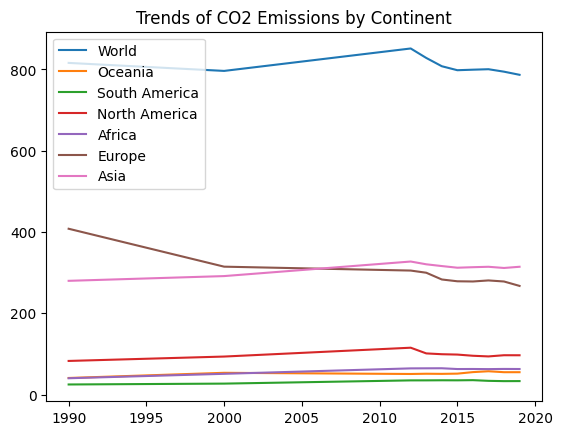

In [ ]:
import csv
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.io as pio

# opening file
fh = open('co2_data.csv')
climate_reader = csv.reader(fh)
data = list(climate_reader)

years = []
labels = data[0] # the first row of the csv works as the dataframe label, so save it separatelty
data.remove(data[0]) # and remove it from the data to make prepare the values for becoming a df
for elem in labels[3:]:
  years.append(int(elem)) # prep "x list" of years for plots later

for line in data:
  for i in range(3, 13):
    line[i] = float(line[i]) # turn values to numbers instead of strings


df_by_year = pd.DataFrame(data[:-7], columns=labels) # make first df!
print("COUNTRY DATAFRAME, BY YEAR:")
print(df_by_year)
print()

df_by_emission = pd.melt(df_by_year, # pd.melt reorganizes the dataframe, in this case making a new entry for each instance of a country,
                          id_vars=['Country Name', 'Country Code', 'Continent'], # to make an "emission" column instead of multiple year columns
                          var_name='Year',
                          value_name='CO2 Emissions')
print("COUNTRY DATAFRAME, BY EMISSION:")
print(df_by_emission)
print()

cont_df_by_year = pd.DataFrame(data[-7:], columns=labels) # making a dataframe in regard to the continental sums instead!
print("CONTINENT DATAFRAME, BY YEAR:")
print(cont_df_by_year)
print()

cont_df_by_emission = pd.melt(cont_df_by_year, # same deal as before with pd.melt
                          id_vars=['Country Name', 'Country Code', 'Continent'],
                          var_name='Year',
                          value_name='CO2 Emissions')
print("CONTINENT DATAFRAME, BY EMISSION:")
print(cont_df_by_emission)
print()

# choropleth!
fig = px.choropleth(df_by_emission, locations='Country Code',
                    color='CO2 Emissions',
                    hover_name='Country Name',
                    animation_frame='Year',
                    range_color=[0, 30],
                    title="Country CO2 Emissions by Year")
fig.show()

# option 1 for line graph, plt
plt.plot(years, data[-1][3:], label=data[-1][0])
plt.plot(years, data[-2][3:], label=data[-2][0])
plt.plot(years, data[-3][3:], label=data[-3][0])
plt.plot(years, data[-4][3:], label=data[-4][0])
plt.plot(years, data[-5][3:], label=data[-5][0])
plt.plot(years, data[-6][3:], label=data[-6][0])
plt.plot(years, data[-7][3:], label=data[-7][0])
plt.legend()
plt.title("Trends of CO2 Emissions by Continent")
plt.show()

# option 2 for line graph, px
fig = px.line(cont_df_by_emission, x="Year", y="CO2 Emissions", color='Continent',
              title="Trends of CO2 Emissions by Continent")
fig.show()
fh = open('line_graph.html', 'w')
pio.write_html(fig, file='line_graph.html', auto_open=True, full_html=False) # preferred method


# sunburst!
fig = px.sunburst(df_by_emission, path=['Continent', 'Country Name'], values='CO2 Emissions',
                  hover_data=['Country Code'], title="CO2 Emissions by Continent")
fig.show()
fh = open('sunburst.html', 'w')
pio.write_html(fig, file='sunburst.html', auto_open=True, full_html=False)



# option 1 for bar graph, vertical
fig = px.bar(cont_df_by_emission, x="Continent", y="CO2 Emissions", color="Year",
             hover_data=["Country Code"], title="Continental CO2 Emissions by Year")
fig.show()
fh = open('barchart.html', 'w')
pio.write_html(fig, file='barchart.html', auto_open=True, full_html=False)



# option 2 for bar graph, horizontal
fig = px.bar(cont_df_by_emission, x="CO2 Emissions", y="Continent", color='Year', orientation='h',
             hover_data=["Country Code"], title="Continental CO2 Emissions by Year")
fig.show()
fh = open('bar2.html', 'w')
pio.write_html(fig, file='bar2.html', auto_open=True, full_html=False)